In [5]:
from model import *
tf.logging.set_verbosity(tf.logging.ERROR)
from tray_analyser import *
import os # File/directory operations
import ntpath # File/directory operations
import matplotlib
import matplotlib.pyplot as plt
import imageio as imio # Reading images
import glob
from collections import Counter
import itertools
import collections
import time

dataImPaths = {'XTrain':os.path.abspath(os.path.join('Data','Image','XTrain')),
             'XTest':os.path.abspath(os.path.join('Data','Image','XTest')),
             'yTrain':os.path.abspath(os.path.join('Data','Image','yTrain')),
             'yTest':os.path.abspath(os.path.join('Data','Image','yTest')),
              'Anno':os.path.abspath(os.path.join('Data','Image','Anno')),
              'ADC':os.path.abspath(os.path.join('Data','Image','ADC'))}

imXTrain = glob.glob(os.path.join(dataImPaths['XTrain'], "*"))
imXTest = glob.glob(os.path.join(dataImPaths['XTest'], "*"))

imYTrain = glob.glob(os.path.join(dataImPaths['yTrain'], "*"))
imYTest = glob.glob(os.path.join(dataImPaths['yTest'], "*"))

annoFiles = glob.glob(os.path.join(dataImPaths['Anno'], "*"))
adcFiles = glob.glob(os.path.join(dataImPaths['ADC'], "*"))

imXTrain.sort()
imXTest.sort()
imYTrain.sort()
imYTest.sort()
annoFiles.sort()
adcFiles.sort()

filePairPathsTrain = list(zip(imXTrain, imYTrain))
filePairPathsTest = list(zip(imXTest, imYTest))

In [6]:
def loadImage(path):
    return imio.imread(path)
    
def showIm(image):
    plt.imshow(image)
    plt.show()
    
def getClassFromID(id):
    data = pd.read_csv('Data/classes.csv')
    return data.loc[data['_id'] == id, '_name'].values[0]

def path_leaf(path):
    """This function gets the file name from a path"""
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

# Data

## Annotated Data Creation

Process to create annotated data:
- Take image of tray
- Use photoshop to secgment objects and associate with class database
- use SegmentMapMerger to create annotated image

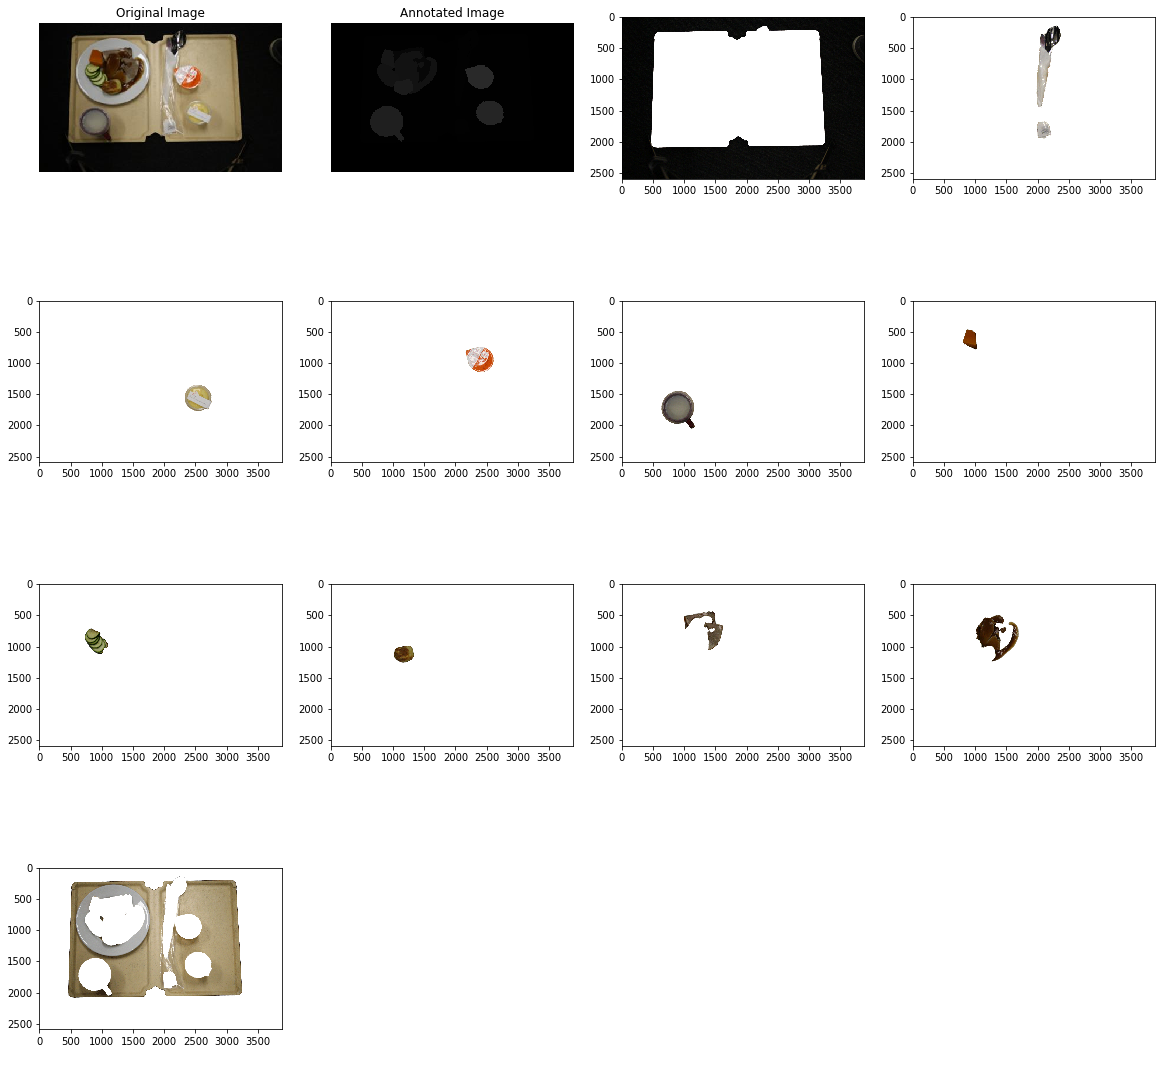

In [7]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(nrows=4, ncols=4)
ax = axes.ravel()

ax[0].imshow(loadImage(imXTrain[0]))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(loadImage(imYTrain[0]),cmap='seismic')
ax[1].set_title("Annotated Image")
ax[1].axis('off')
ax[-1].axis('off')
ax[-2].axis('off')
ax[-3].axis('off')

for i in range(0,len(annoFiles)):
    ax[i+2].imshow(loadImage(annoFiles[i]))

plt.show()

## Additional Data Creator

Filters are aplied to the original dataset to create augmented data

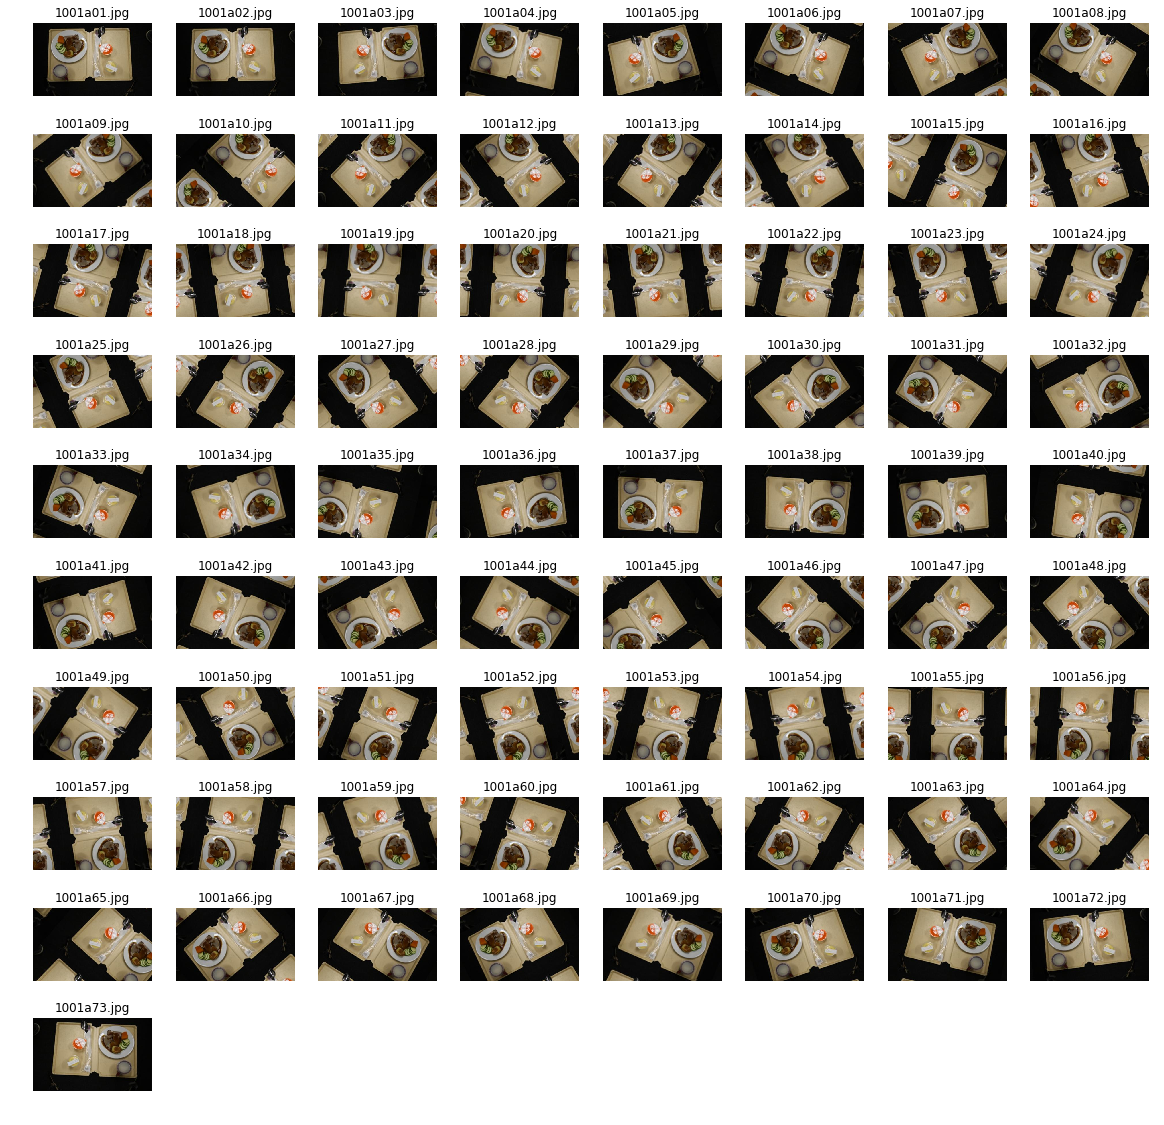

Size of final training dataset = 17 * 71 = 1207


In [8]:
matplotlib.rcParams['figure.figsize'] = [20, 20]

fig, axes = plt.subplots(nrows=10, ncols=8)
ax = axes.ravel()

for i in range(0,len(adcFiles)):
    ax[i].imshow(loadImage(adcFiles[i]))
    ax[i].set_title(path_leaf(adcFiles[i]))
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
ax[-3].axis('off')
ax[-4].axis('off')
ax[-5].axis('off')
ax[-6].axis('off')
ax[-7].axis('off')
plt.show()

print('Size of final training dataset = 17 * 71 = 1207')

# Model inference

In [9]:
# Load the model
start = time.time()
model = vgg_unet(43, 256, 416)
model.load_weights(os.path.abspath(os.path.join('Data','weights.h5')))
end = time.time()
print('Time to load model:')
print(end - start)

Time to load model:
1.3212637901306152


In [10]:
demoFor = 'train'

filePairPaths = None
imData = None

if (demoFor == 'train'):
    filePairPaths = filePairPathsTrain
    imData = imXTrain
else:
    filePairPaths = filePairPathsTest
    imData = imXTest
    

1001a.png

Time to create segmentation map:
0.6275713443756104


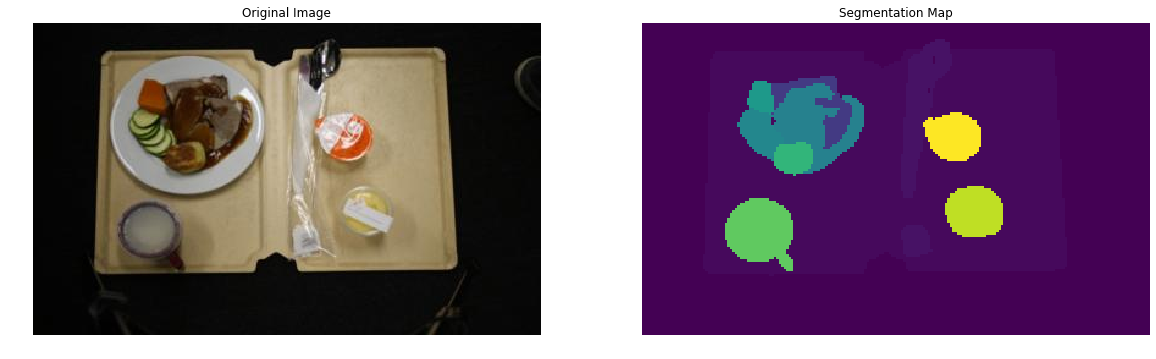

True contents: 
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']

Model predicted: 
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']

SSC: 1.0
1006a.png

Time to create segmentation map:
0.49831557273864746


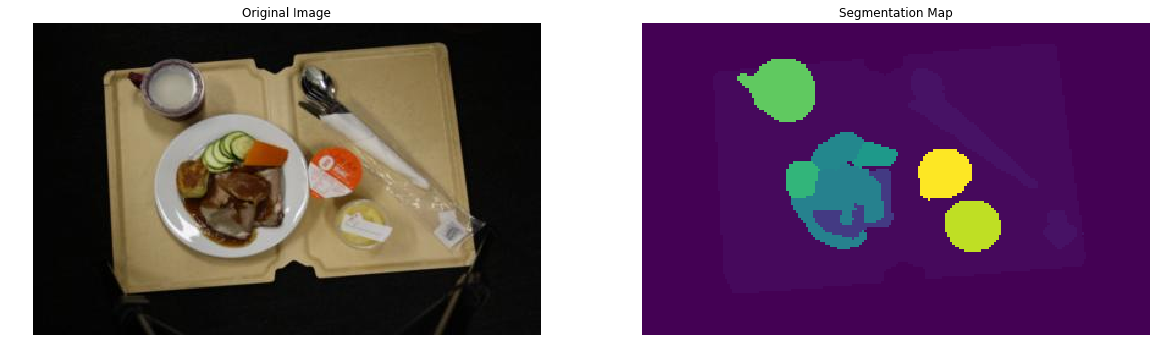

True contents: 
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']

Model predicted: 
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']

SSC: 1.0
2001a.png

Time to create segmentation map:
0.5899362564086914


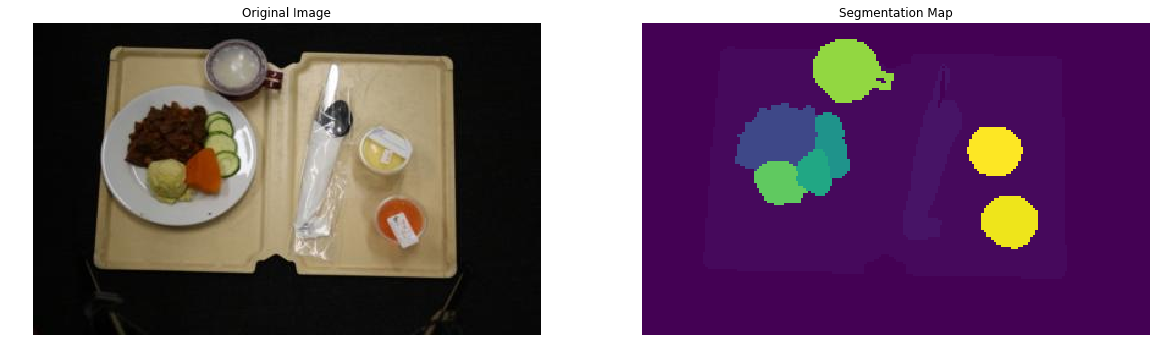

True contents: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

Model predicted: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

SSC: 1.0
2003a.png

Time to create segmentation map:
0.6213712692260742


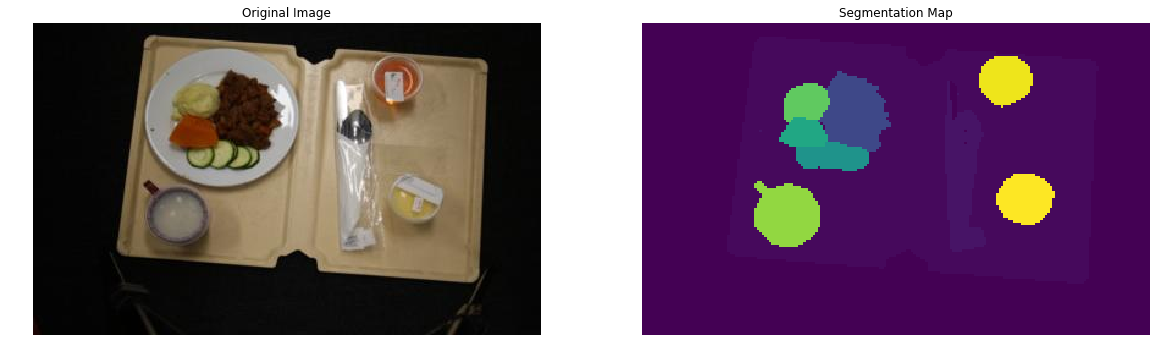

True contents: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

Model predicted: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

SSC: 1.0
3001a.png

Time to create segmentation map:
0.6560952663421631


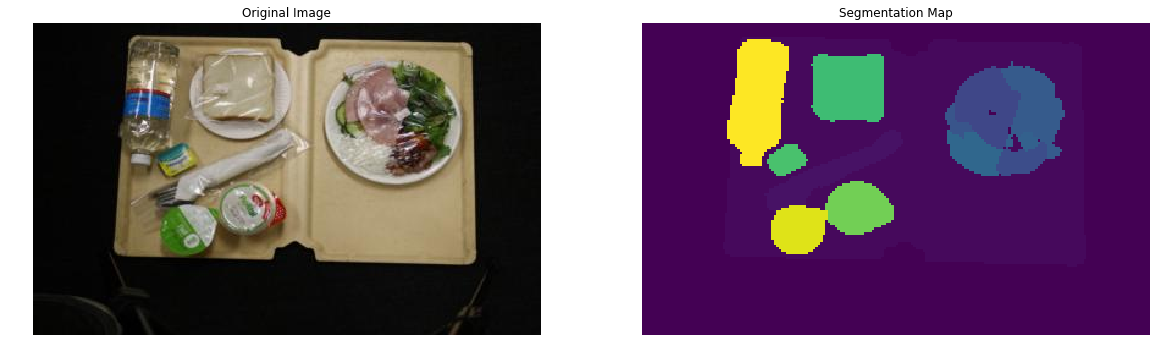

True contents: 
['background', 'tray', 'cutlery', 'ham', 'bean', 'cucumber', 'leaf', 'tomato', 'boiled rice', 'bread', 'margarine', 'canned fruit', 'apple juice', 'water']

Model predicted: 
['background', 'tray', 'cutlery', 'ham', 'bean', 'cucumber', 'leaf', 'tomato', 'boiled rice', 'bread', 'margarine', 'canned fruit', 'apple juice', 'water']

SSC: 1.0
4001a.png

Time to create segmentation map:
0.7731790542602539


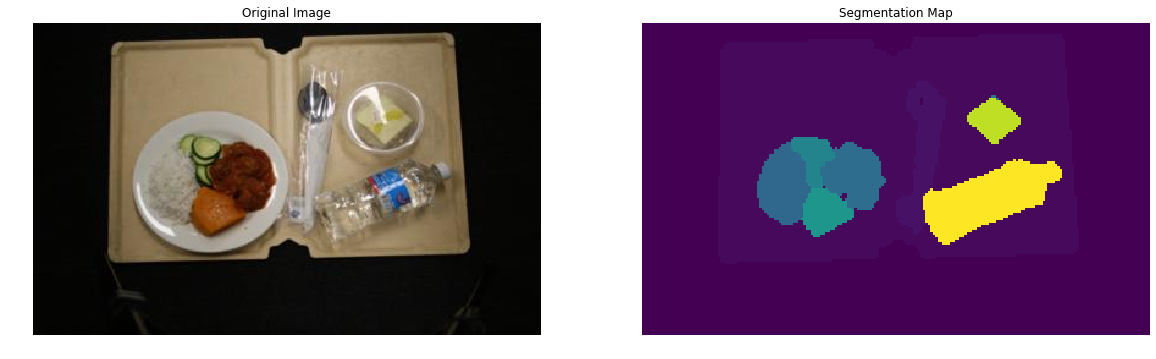

True contents: 
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']

Model predicted: 
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']

SSC: 1.0
4002a.png

Time to create segmentation map:
0.5311238765716553


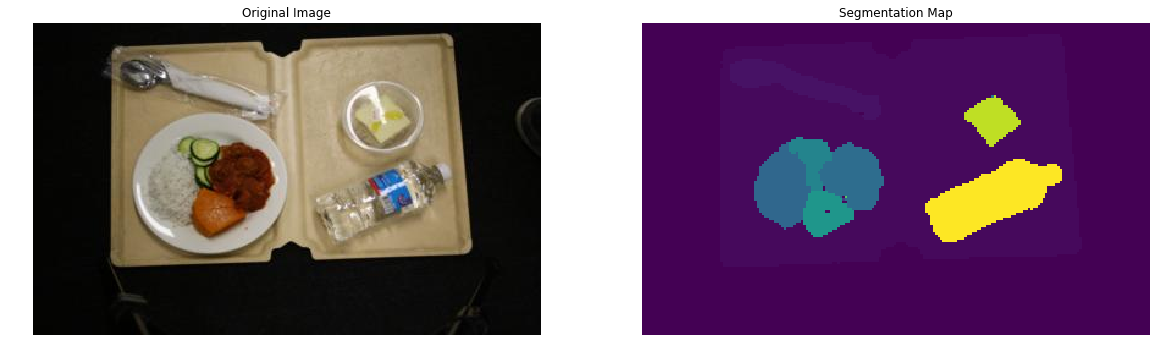

True contents: 
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']

Model predicted: 
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']

SSC: 1.0
5001a.png

Time to create segmentation map:
0.4992547035217285


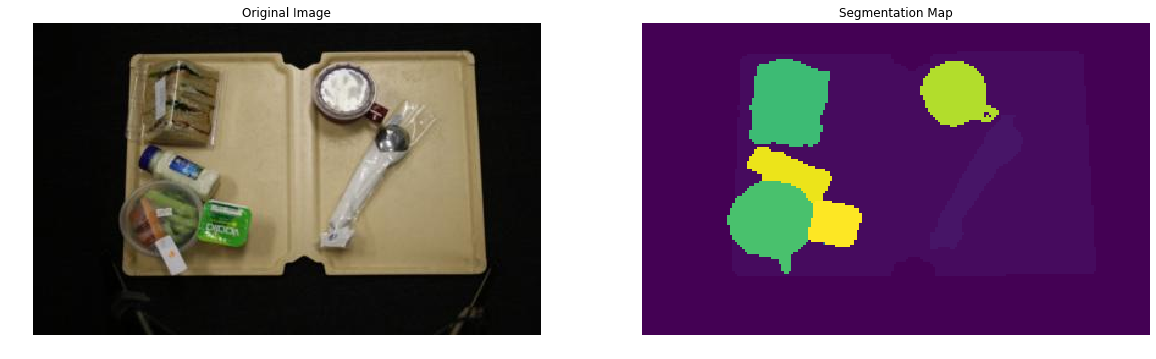

True contents: 
['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']

Model predicted: 
['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']

SSC: 1.0
5007a.png

Time to create segmentation map:
0.5183708667755127


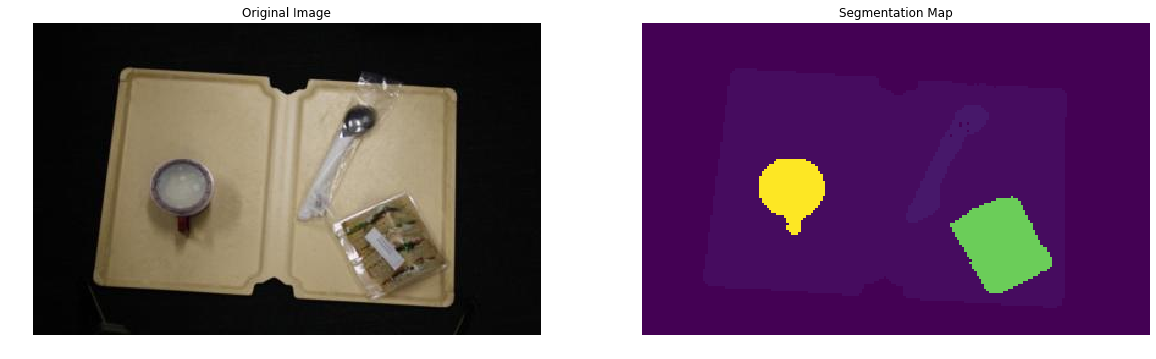

True contents: 
['background', 'tray', 'cutlery', 'sandwich', 'soup']

Model predicted: 
['background', 'tray', 'cutlery', 'sandwich', 'soup']

SSC: 1.0
5011a.png

Time to create segmentation map:
0.7290537357330322


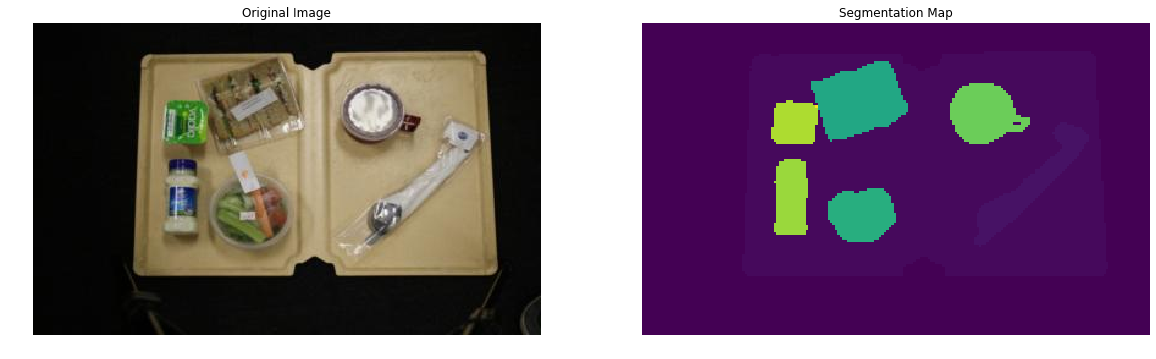

True contents: 
['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']

Model predicted: 
['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']

SSC: 1.0
6001a.png

Time to create segmentation map:
0.5702300071716309


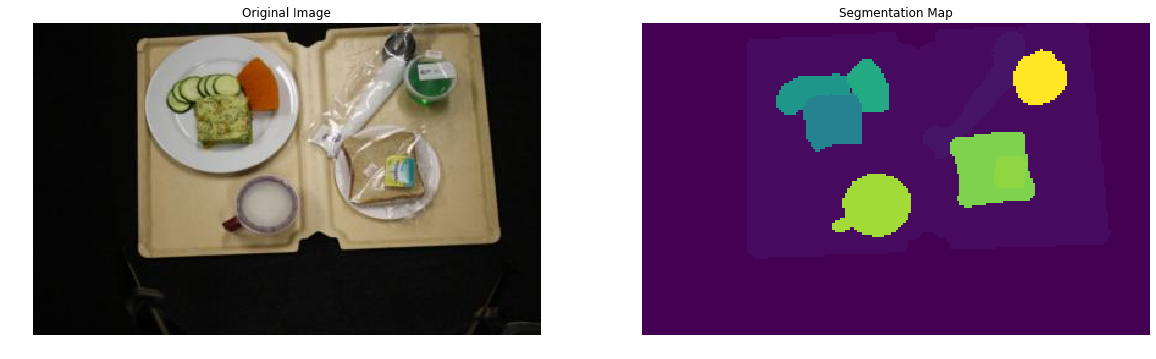

True contents: 
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'jelly']

Model predicted: 
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'jelly']

SSC: 1.0
6010a.png

Time to create segmentation map:
0.7029030323028564


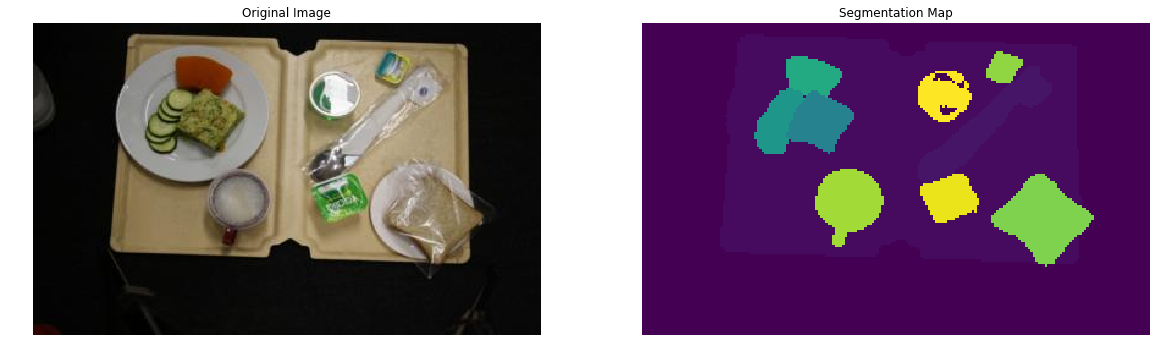

True contents: 
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'vanilla yogurt', 'jelly']

Model predicted: 
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'vanilla yogurt', 'jelly']

SSC: 1.0
7001a.png

Time to create segmentation map:
0.8321511745452881


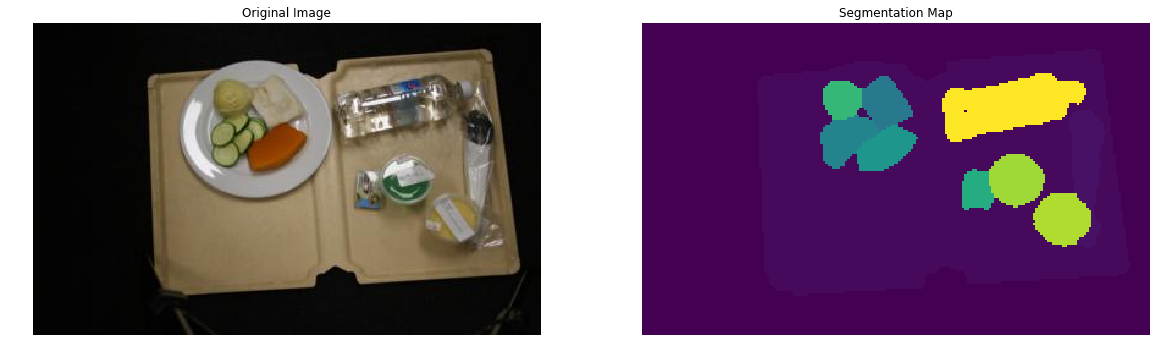

True contents: 
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']

Model predicted: 
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']

SSC: 1.0
7004a.png

Time to create segmentation map:
0.7099757194519043


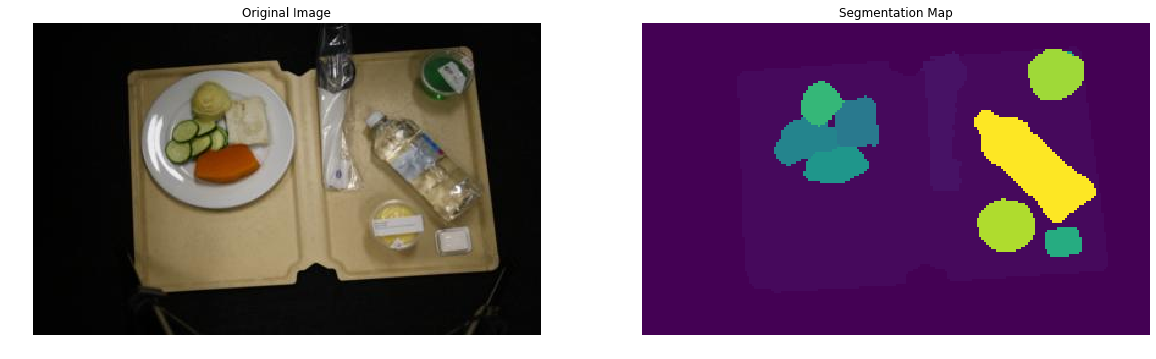

True contents: 
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']

Model predicted: 
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']

SSC: 1.0
8001a.png

Time to create segmentation map:
0.7504968643188477


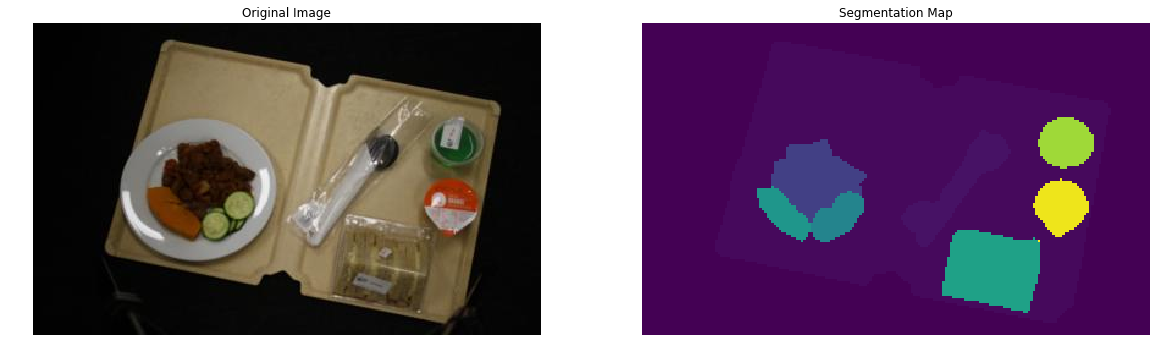

True contents: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']

Model predicted: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']

SSC: 1.0
8005a.png

Time to create segmentation map:
0.7498297691345215


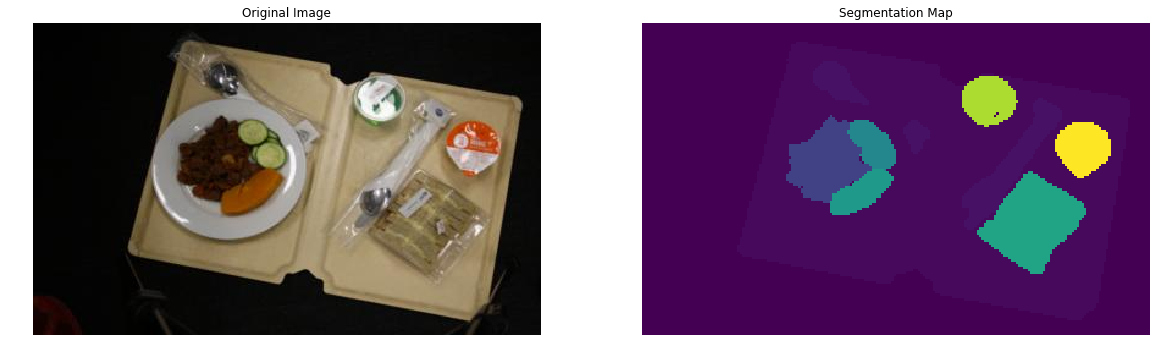

True contents: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']

Model predicted: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']

SSC: 1.0
8007a.png

Time to create segmentation map:
0.9109532833099365


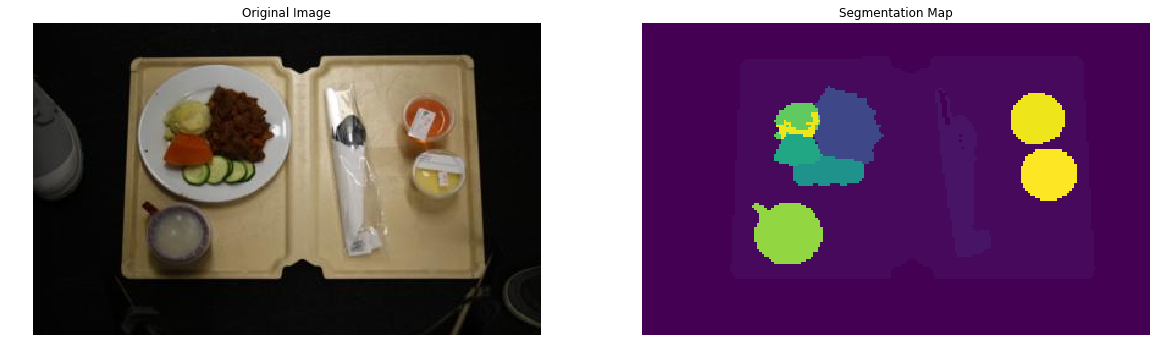

True contents: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

Model predicted: 
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']

SSC: 1.0


In [11]:
modelOutputs = {}
matplotlib.rcParams['figure.figsize'] = [20, 10]
for im, real in zip(filePairPaths, imData):
    print(path_leaf(im[1]))
    #Create segmentation map using image
    start = time.time()
    out = model.predict_segmentation(inp=im[0])   
    end = time.time()
    print('\nTime to create segmentation map:')
    print(end - start)
    true = imio.imread(im[1])
    
    uniqueTrue = reduceSSCNoise(true,0)
    uniquePred = reduceSSCNoise(out)
    
    
    uniqueTrue.sort()
    uniquePred.sort()
    
    modelOutputs[path_leaf(im[0])] = {
        'yTest':uniqueTrue,
        'yPred':uniquePred,
        'in':loadImage(im[0]),
        'out':out
    }
    
    
    

    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(loadImage(im[0]))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(out)
    ax[1].set_title('Segmentation Map')
    ax[1].axis('off')       
    plt.show()

    
    print('True contents: ')
    print([getClassFromID(x) for x in modelOutputs[path_leaf(im[0])]['yTest']])
    print('\nModel predicted: ')
    print([getClassFromID(x) for x in modelOutputs[path_leaf(im[0])]['yPred']])
    print('\nSSC: ' + str(SSC(true,reduceSSCNoise(out))))

# Heat and Cold mapping

1001a.jpg


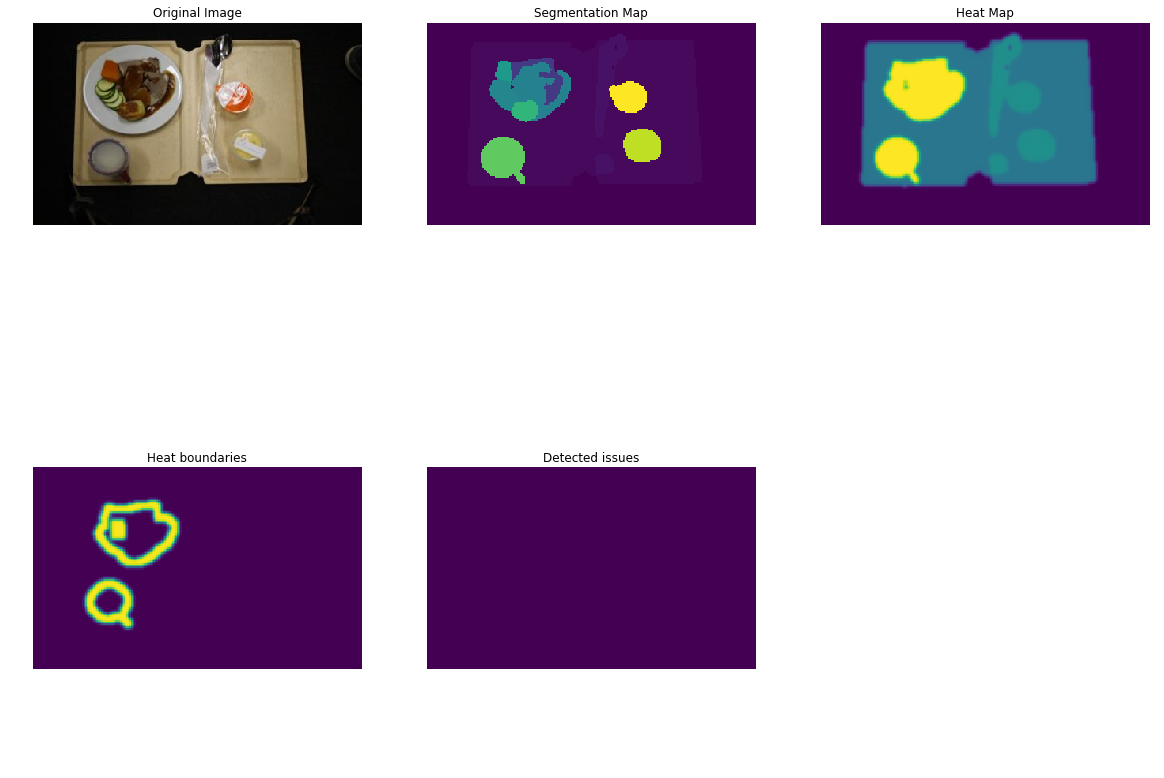

1006a.jpg


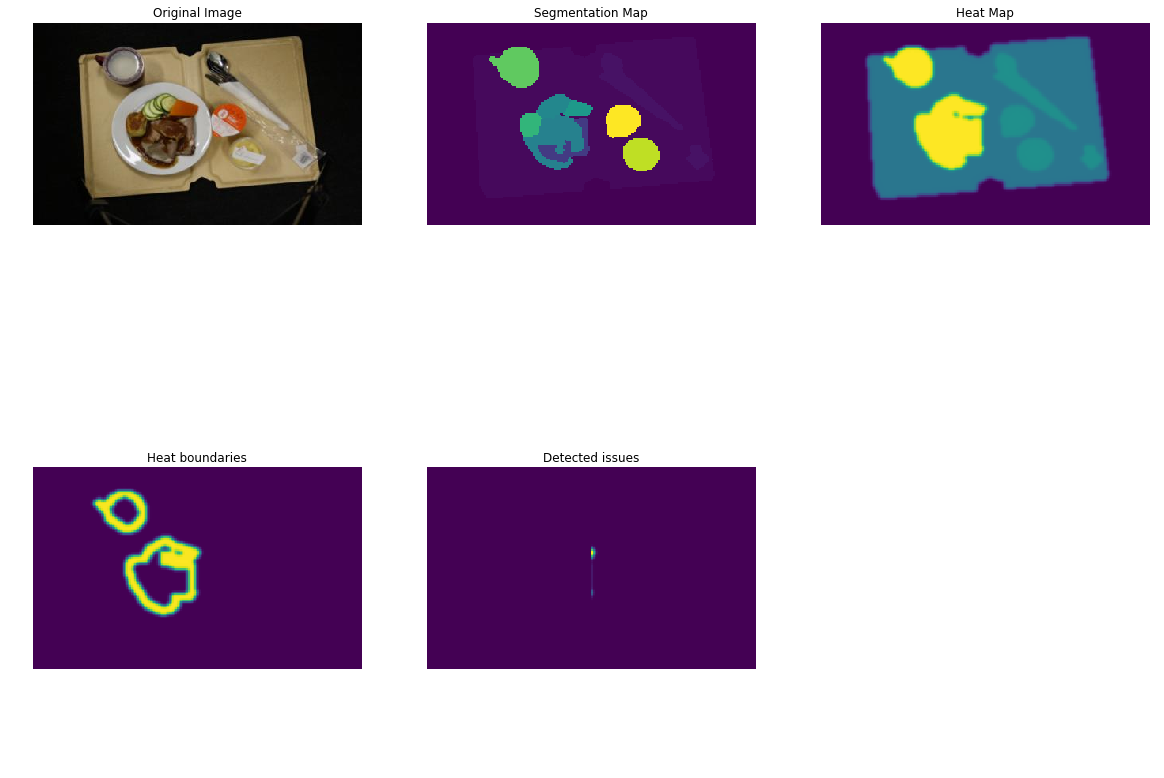

2001a.jpg


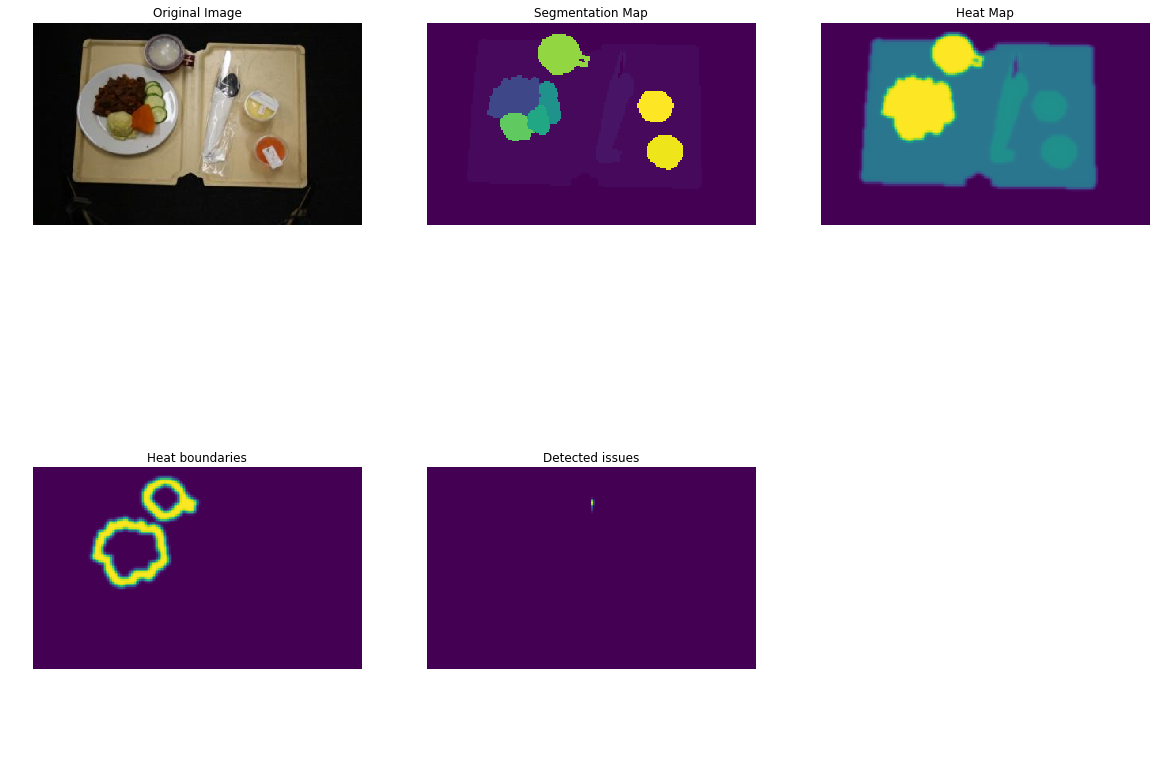

2003a.jpg


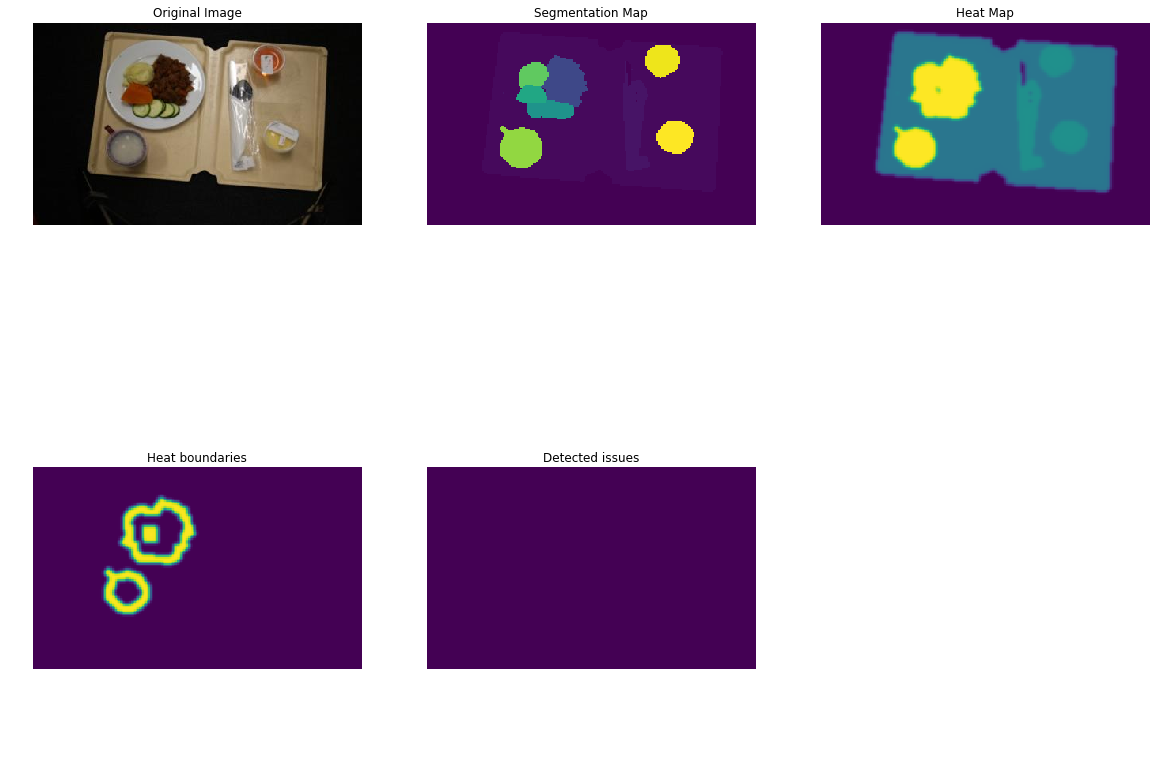

3001a.jpg


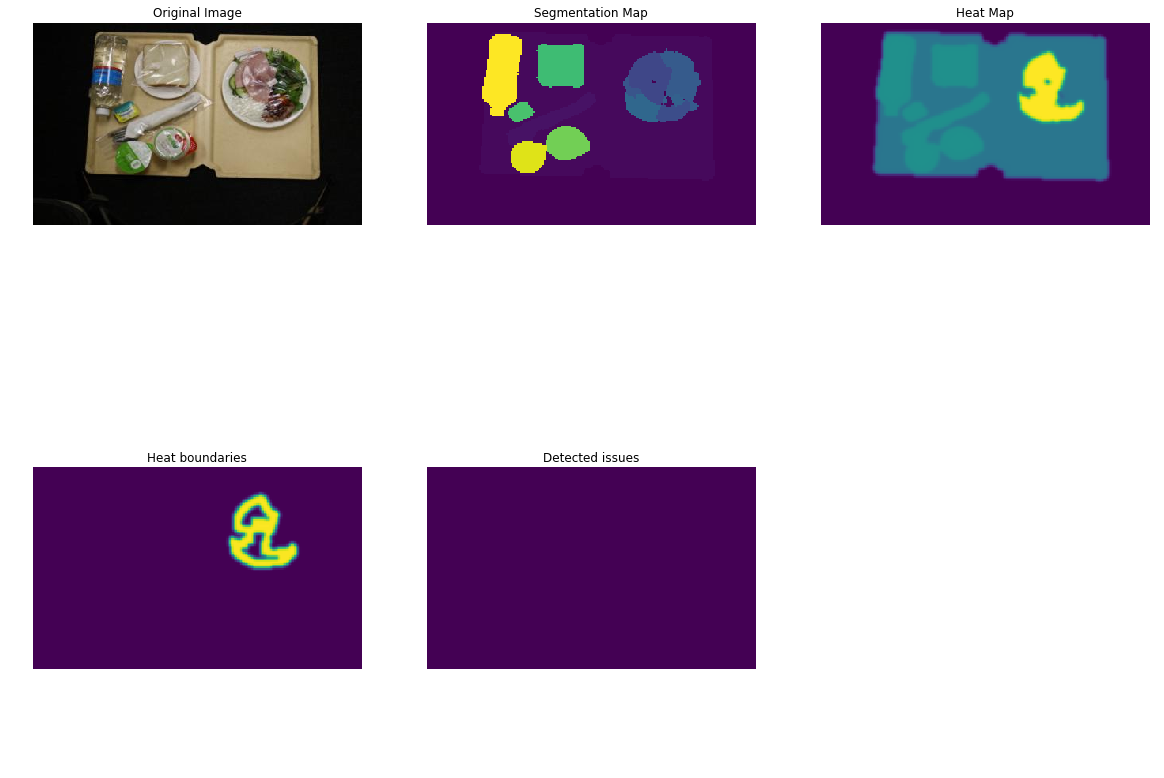

4001a.jpg


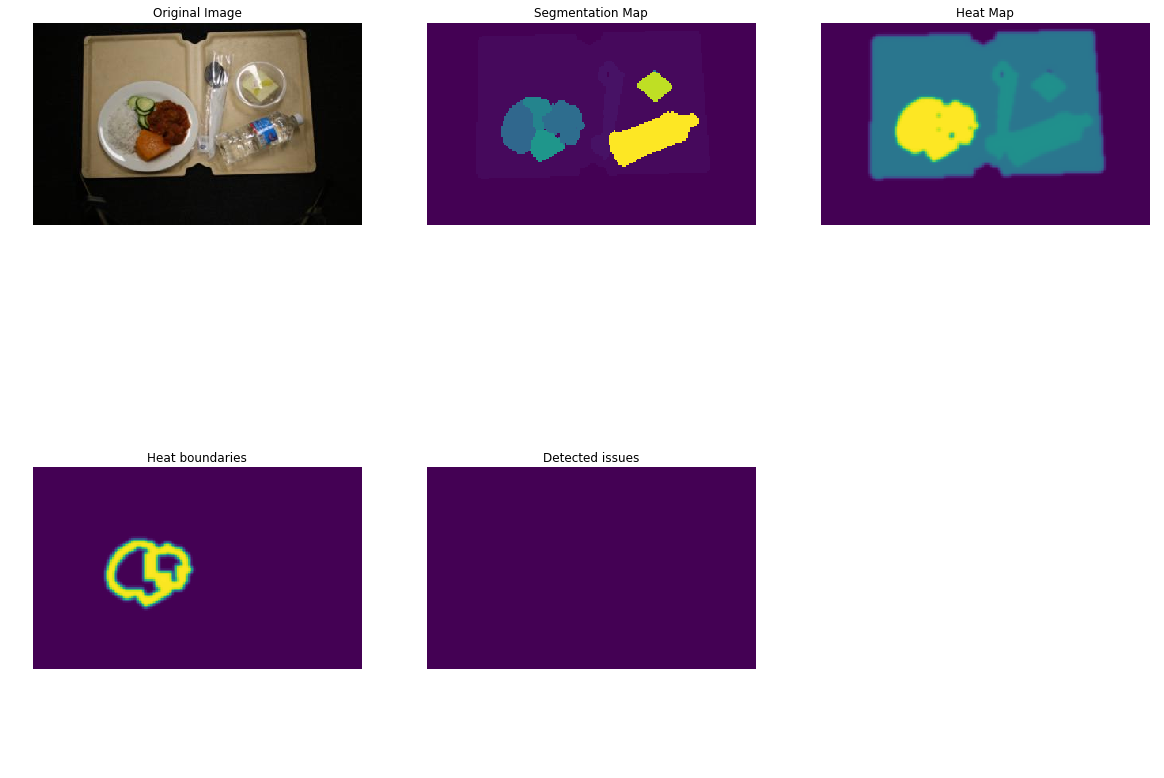

4002a.JPG


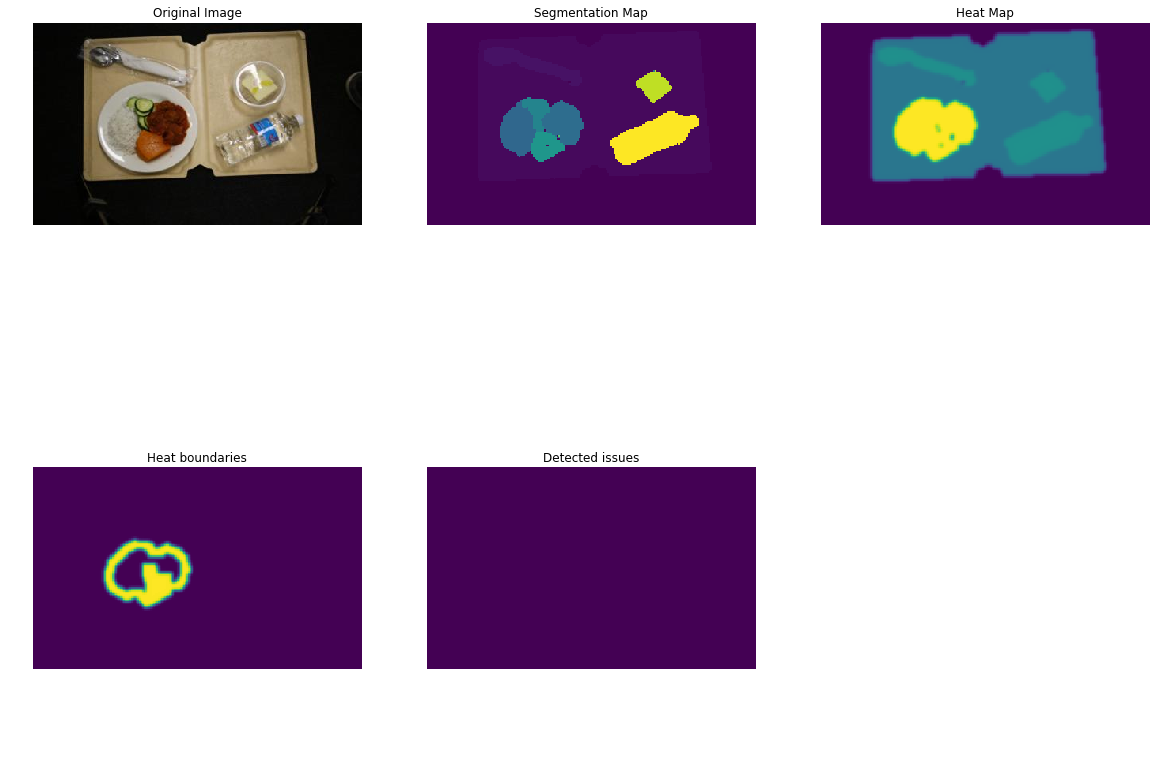

5001a.jpg


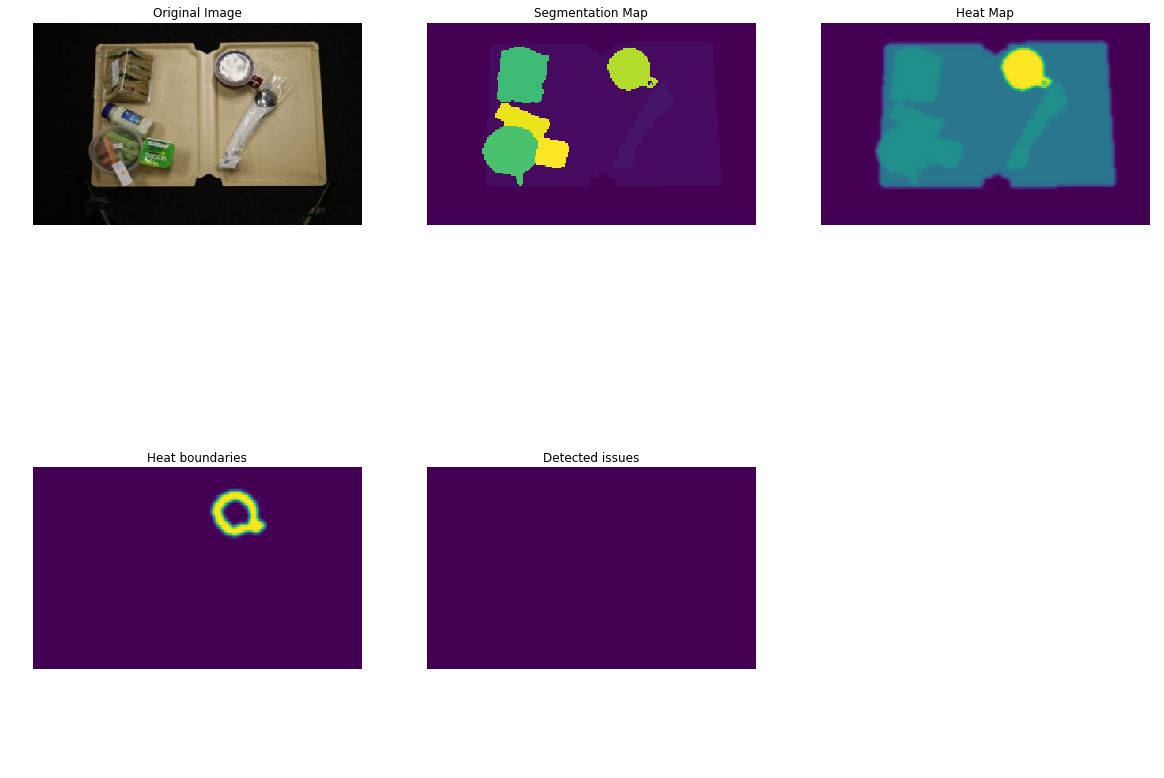

5007a.jpg


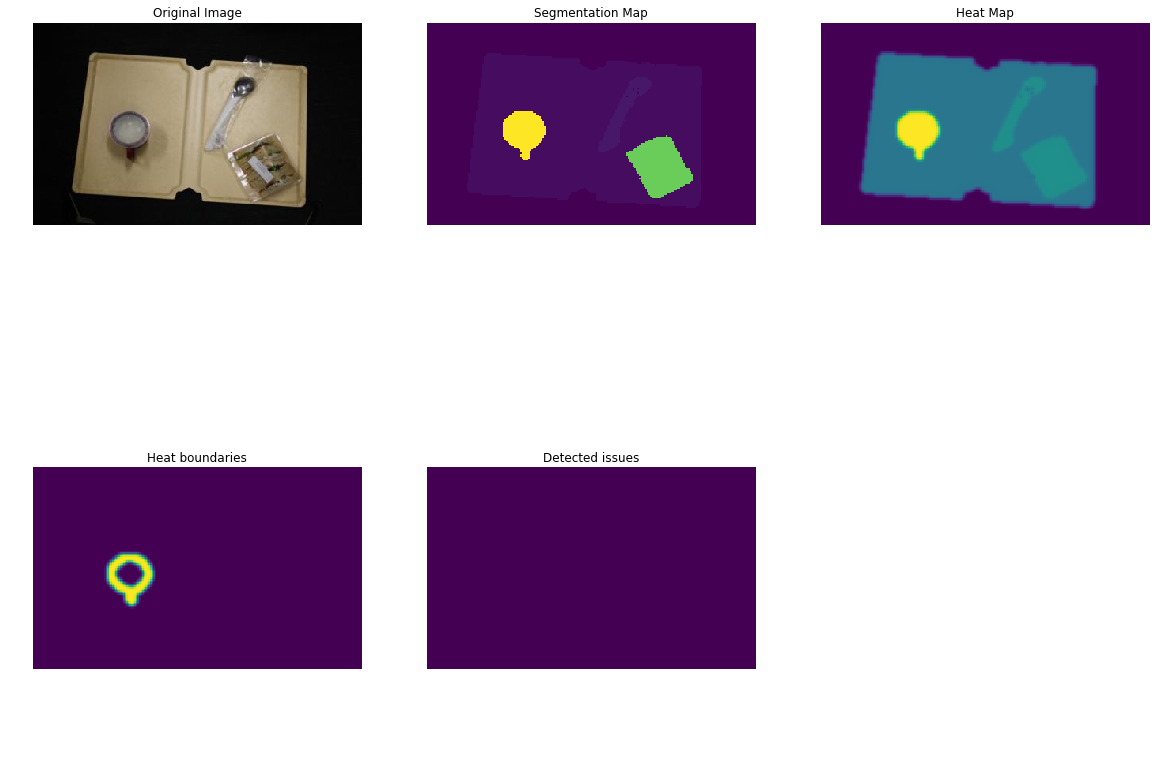

5011a.jpg


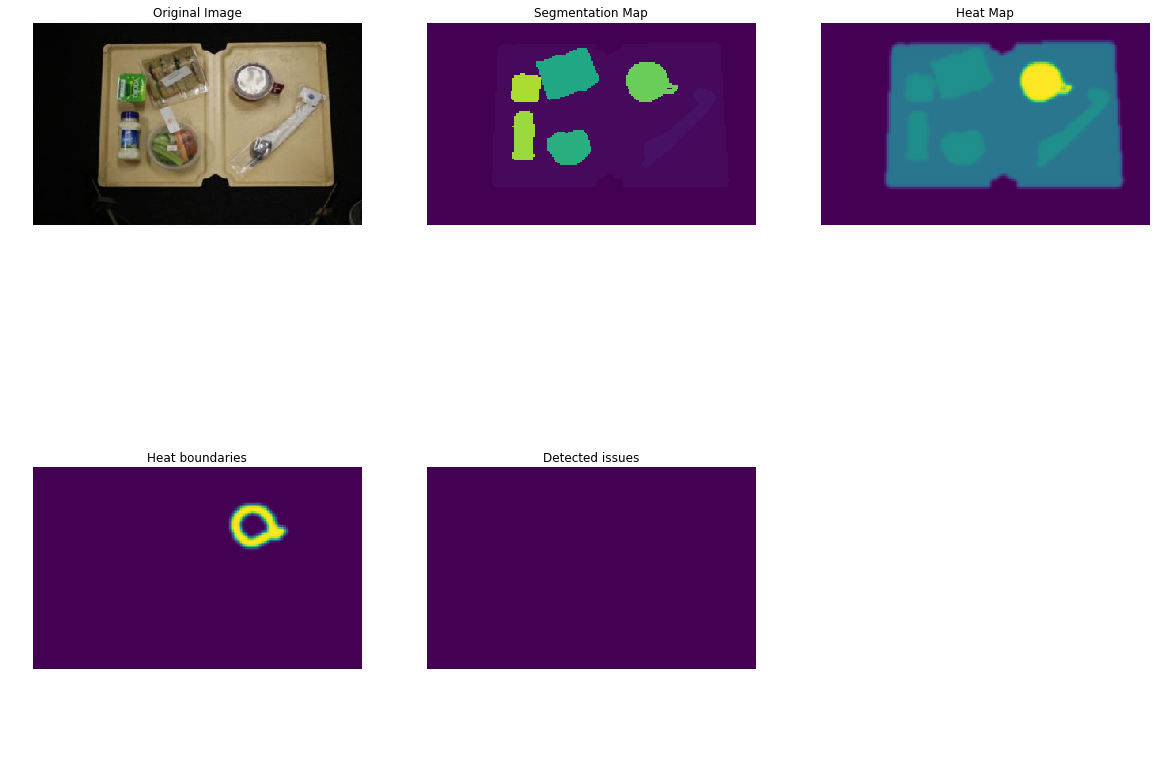

6001a.jpg


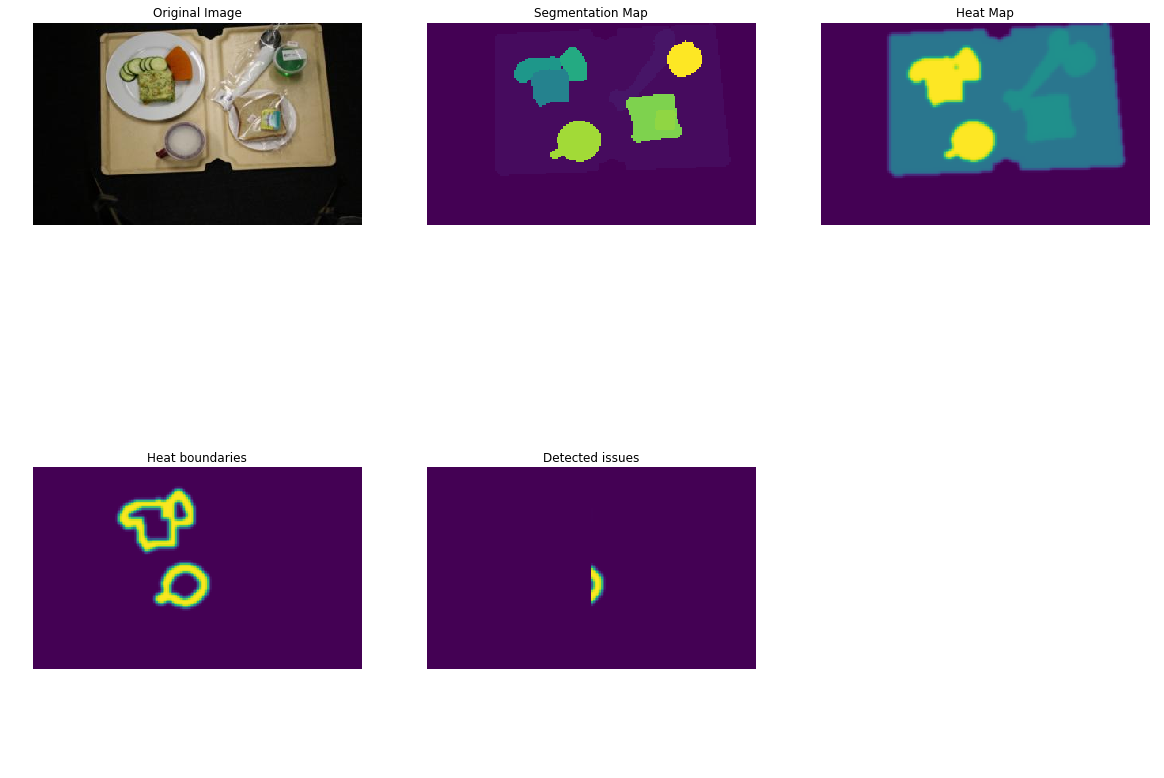

6010a.jpg


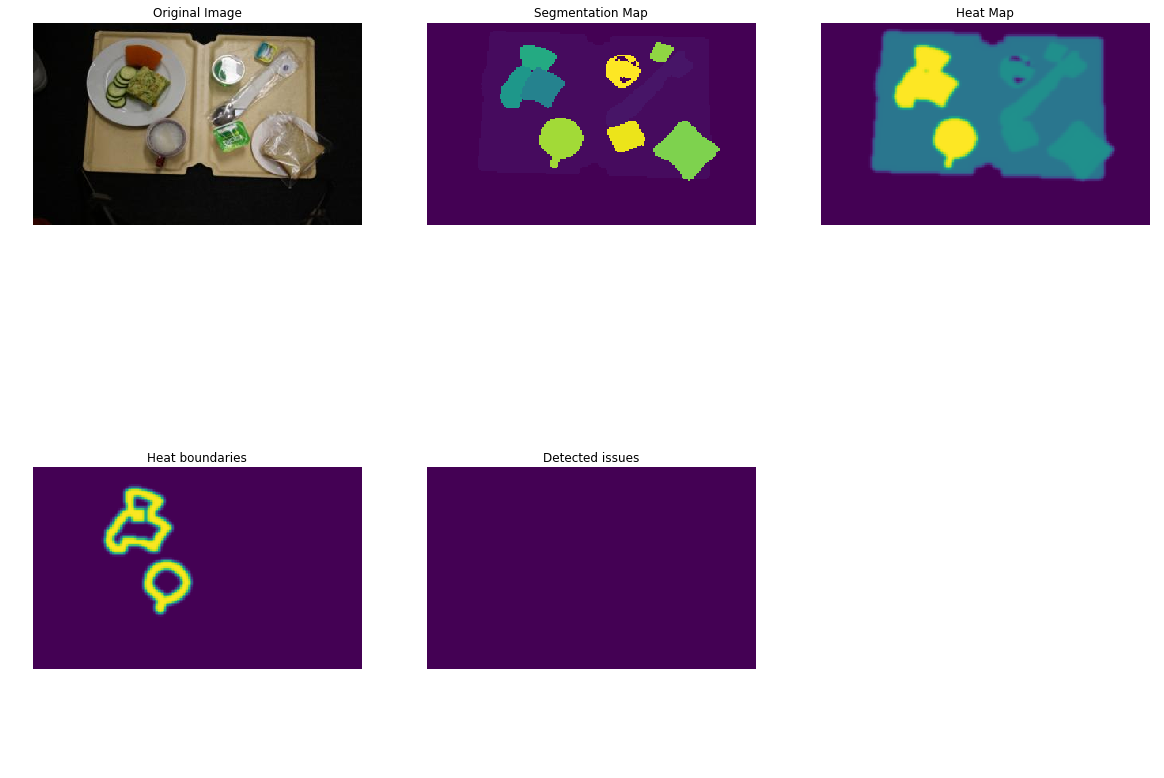

7001a.jpg


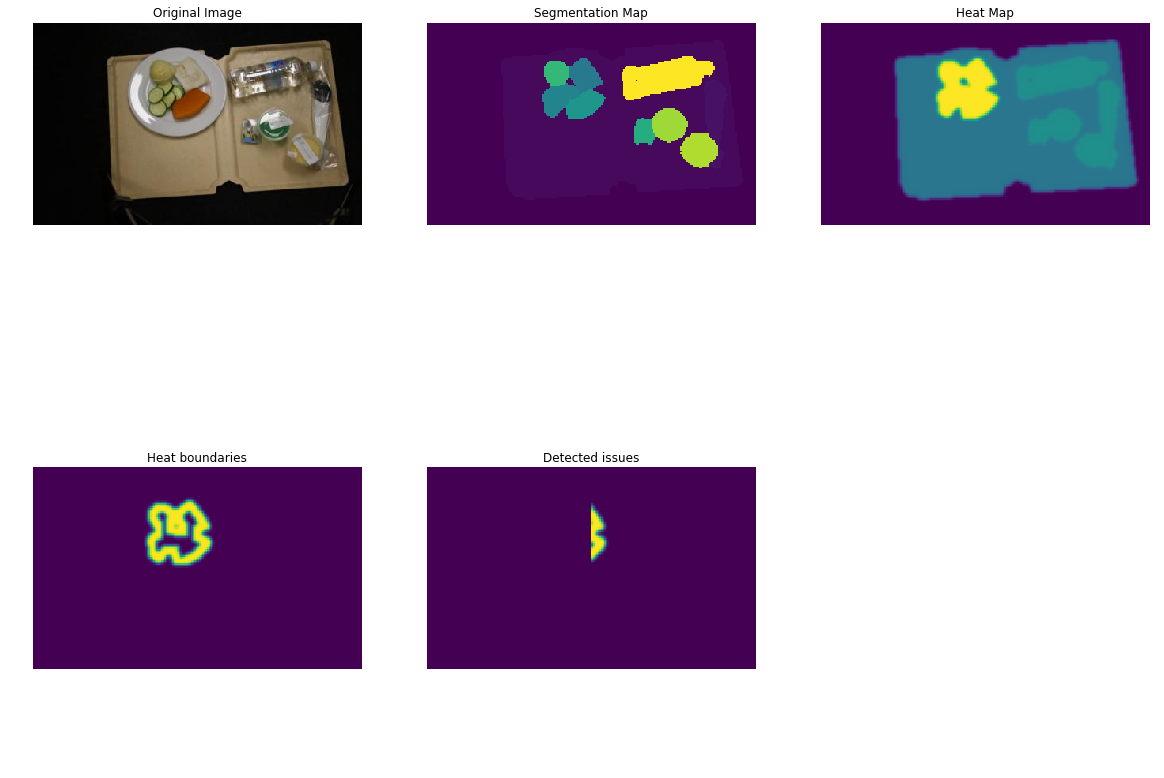

7004a.jpg


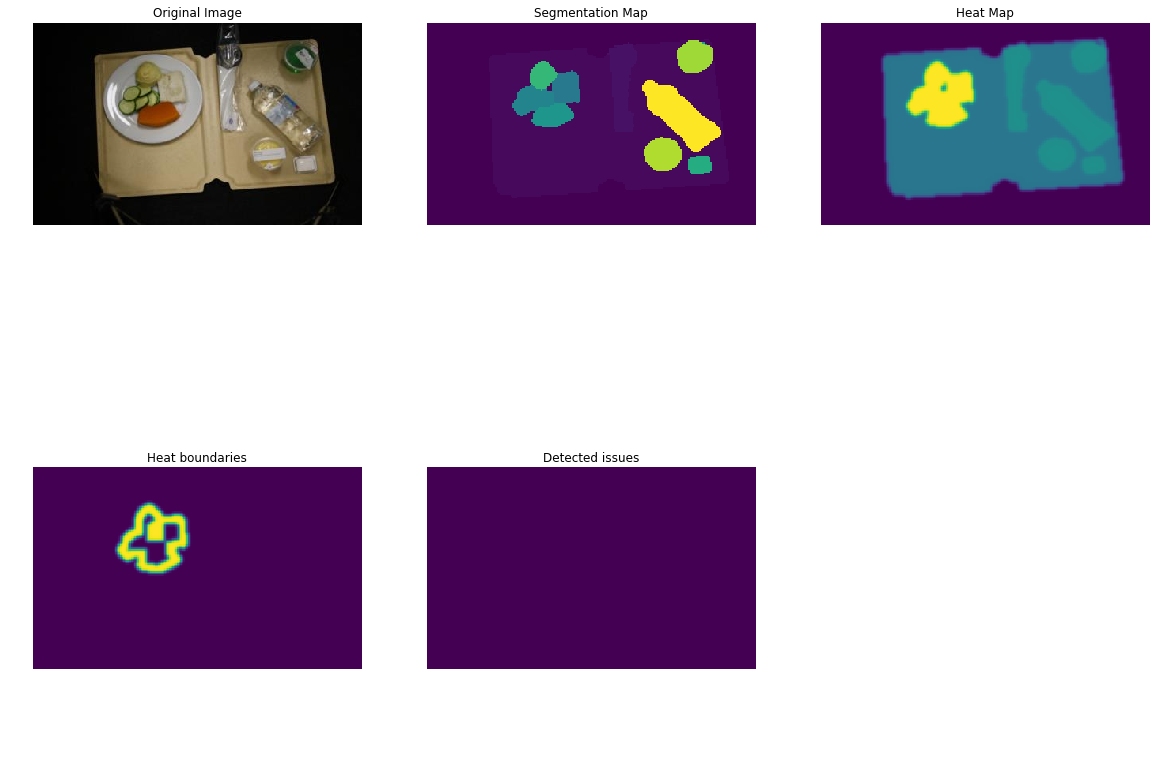

8001a.jpg


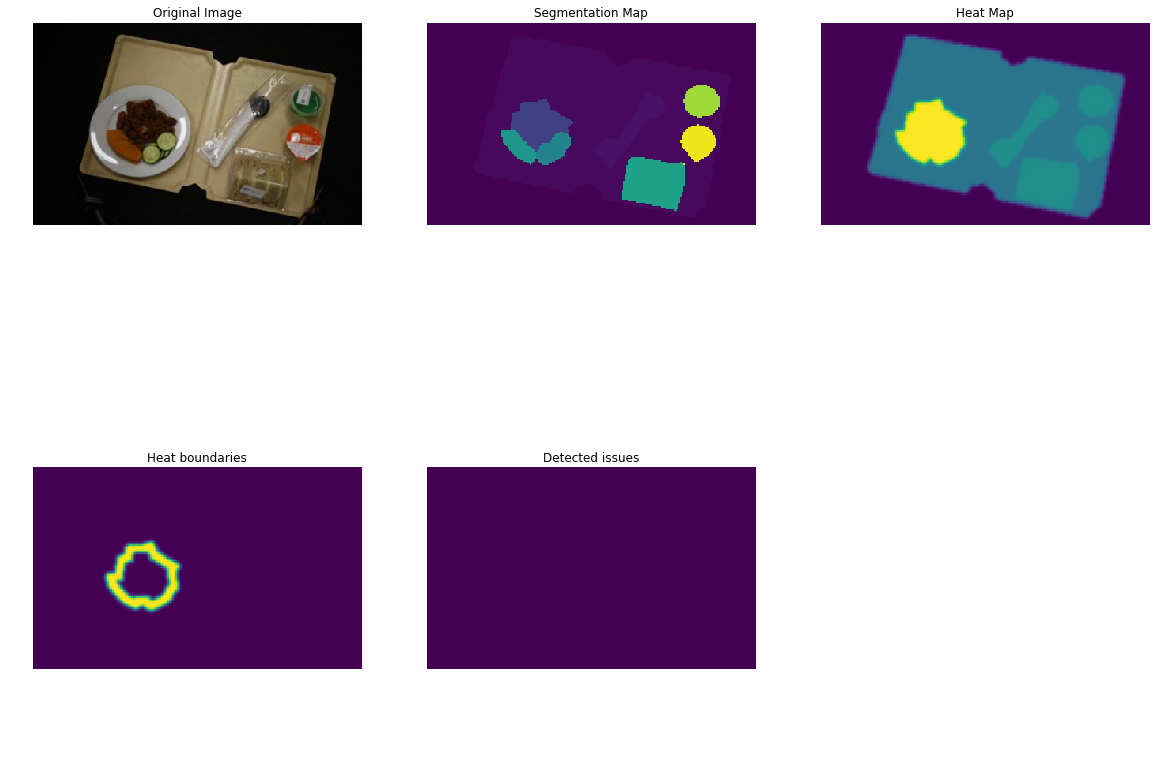

8005a.jpg


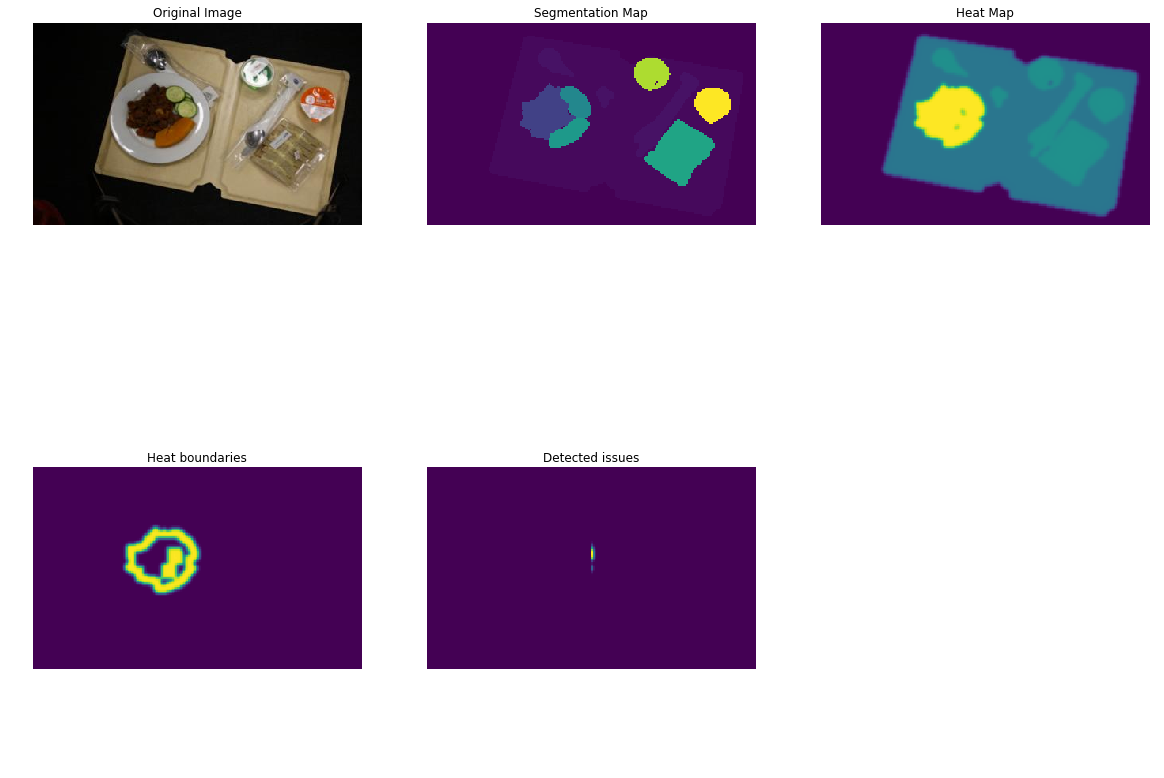

8007a.jpg


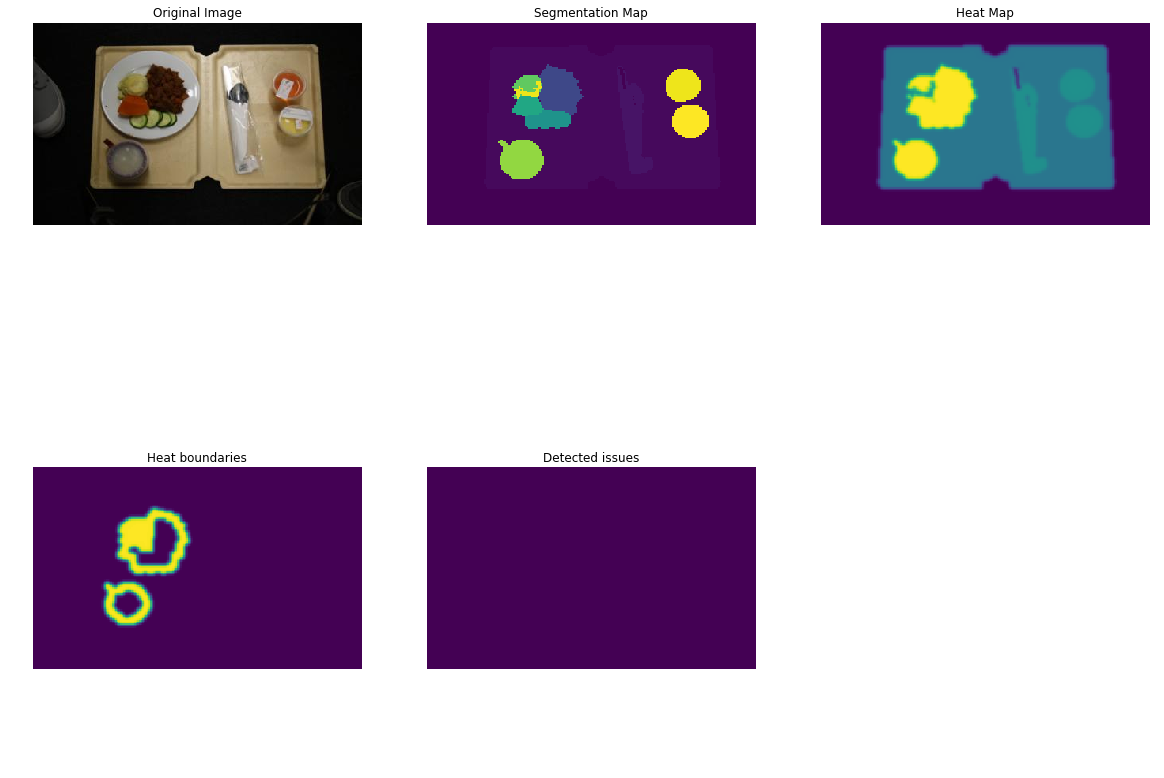

In [12]:
matplotlib.rcParams['figure.figsize'] = [20, 15]
for im in filePairPaths:
    key = path_leaf(im[0])
    print(key)
    modelIn = modelOutputs[key]['in']
    modelOut = modelOutputs[key]['out']
    
    hMap = generateHeatMap(modelOut, reduceSSCNoise(modelOut))
    hMapInter = identifyHeatColdIntersections(hMap)
    issues = determineHeatColdIntersectionIssues(hMapInter)
    
    fig, axes = plt.subplots(nrows=2, ncols=3)
    ax = axes.ravel()
    ax[0].imshow(modelIn)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(modelOut)
    ax[1].set_title('Segmentation Map')
    ax[1].axis('off')   
    ax[2].imshow(hMap)
    ax[2].set_title('Heat Map')
    ax[2].axis('off')  
    ax[3].imshow(hMapInter)
    ax[3].set_title('Heat boundaries')
    ax[3].axis('off')  
    ax[4].imshow(issues)
    ax[4].set_title('Detected issues')
    ax[4].axis('off')  
    ax[5].axis('off')  
    plt.show()